# Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing days.csv 
df=pd.read_csv("cardata.csv")

In [4]:
# view some sample records
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
# check shape
df.shape

(892, 6)

In [6]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
# check describe
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


# Data Preparation & Cleaning

In [8]:
#copy backup dataset
df1=df.copy()

### Data checking

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

In [9]:
#year has many non-year values
df=df[df['year'].str.isnumeric()]
df['year']=df['year'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [11]:
#Price has Ask for Price please ignore that
df=df[df['Price']!='Ask For Price']

In [12]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel


In [13]:
#Price has commas in its prices and is in object and convert into int
df['Price']=df['Price'].str.replace(',','').astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [15]:
#kms_driven has object values with kms at last get first item and remove ,
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')
df=df[df['kms_driven'].str.isnumeric()]
df['kms_driven']=df['kms_driven'].astype(int)

In [16]:
#fuel_type has nan values remove it
df=df[~df["fuel_type"].isna()]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [18]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [19]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [20]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [21]:
#Resetting the index of the final cleaned data
df=df.reset_index(drop=True)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [22]:
# check describe
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [23]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

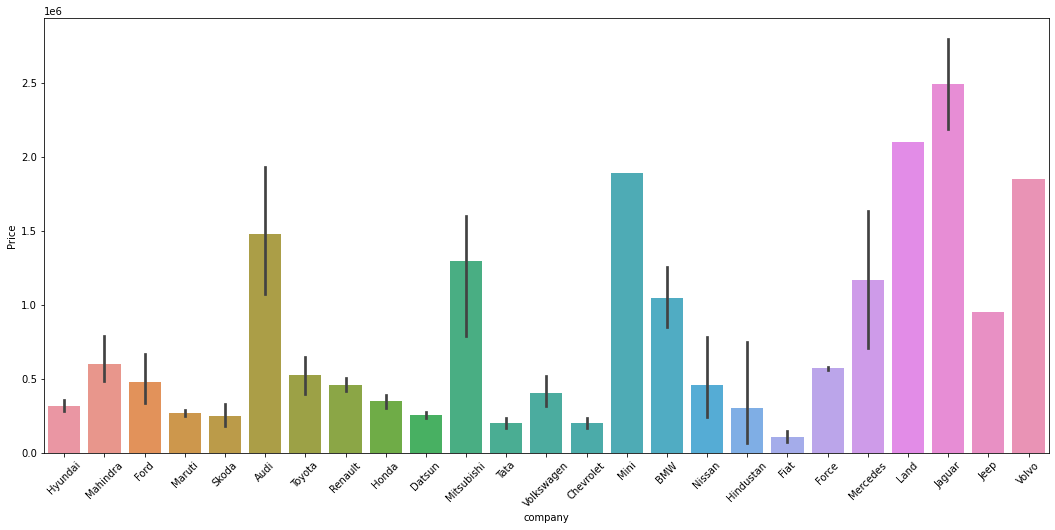

In [24]:
# checking outliers in the numerical col

plt.subplots(figsize=(18,8))
sns.barplot(x='company',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()


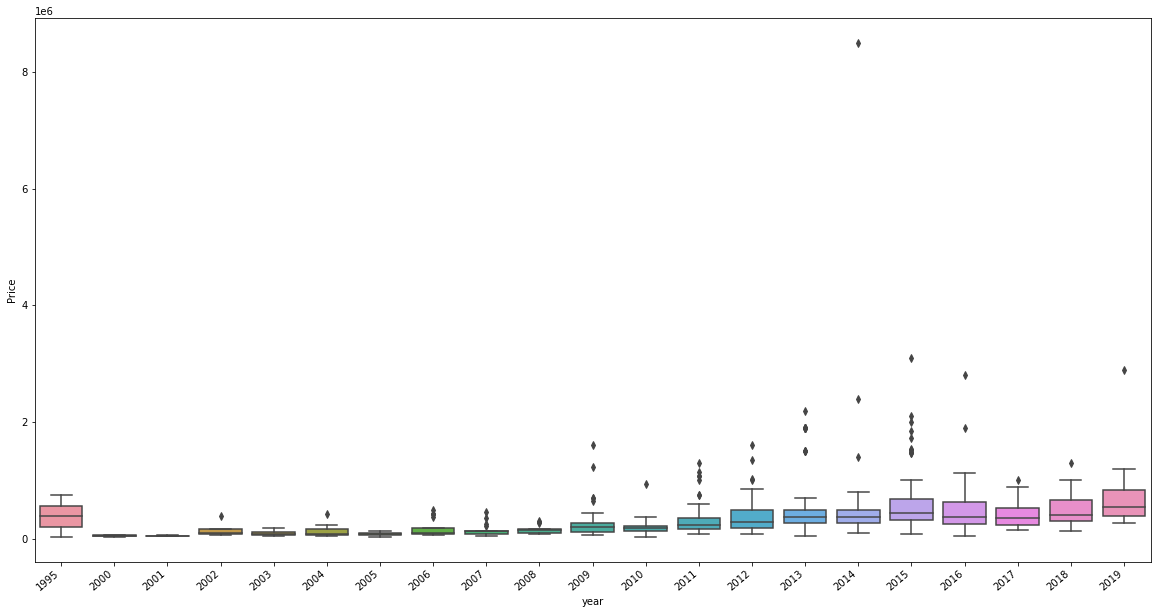

In [25]:
plt.subplots(figsize=(20,10))
ax=sns.boxplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

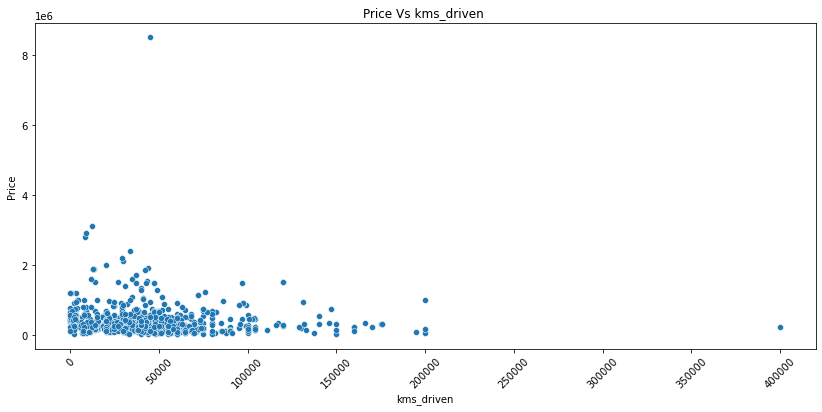

In [26]:
plt.figure(figsize=(14, 6))

sns.scatterplot(df.kms_driven,df.Price)
plt.xlabel('kms_driven')
plt.ylabel('Price')
plt.title('Price Vs kms_driven ')
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

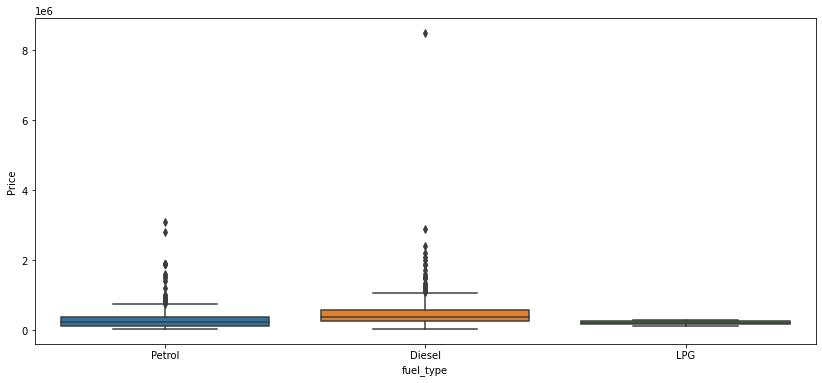

In [27]:
plt.subplots(figsize=(14,6))
sns.boxplot(x='fuel_type',y='Price',data=df)

In [28]:
#segregate num(int) columns
num_vars = df.select_dtypes(include='int32').columns
num_vars

Index(['year', 'Price', 'kms_driven'], dtype='object')

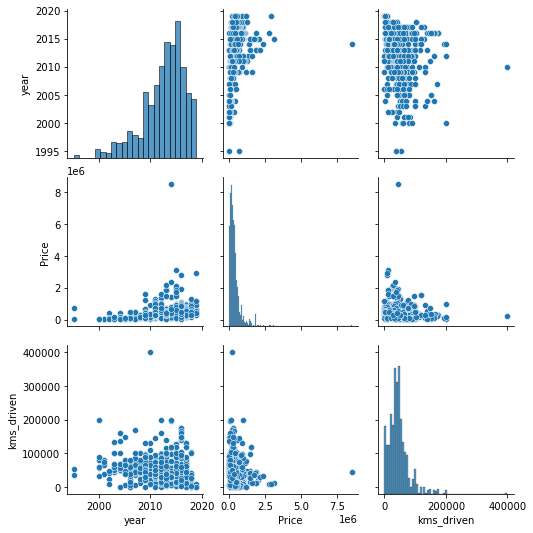

In [29]:
sns.pairplot(df[num_vars])
plt.show()

In [30]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


### Extracting Training Data

## Data for Modelling

In [31]:
# Get the dummy variables for the feature 'company' and store it in a new variable - 'df_new'

cmp_new = pd.get_dummies(df['company'],drop_first=True)

# Check what the dataset 'df_new' looks like
cmp_new.head()

,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,Honda,Hyundai,Jaguar,...,Mercedes,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Get the dummy variables for the feature 'flue' and store it in a new variable - 'flue_new'

flue_new = pd.get_dummies(df['fuel_type'],drop_first=True)

# Check what the dataset 'flue_new' looks like
flue_new.head()

,LPG,Petrol
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0


In [33]:
# Get the dummy variables for the feature 'name' and store it in a new variable - 'name_new'

name_new = pd.get_dummies(df['name'],drop_first=True)

# Check what the dataset 'fname_new' looks like
name_new.head()

,Audi A4 1.8,Audi A4 2.0,Audi A6 2.0,Audi A8,Audi Q3 2.0,Audi Q5 2.0,Audi Q7,BMW 3 Series,BMW 5 Series,BMW 7 Series,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Add the results to the original df dataframe
df_new = pd.concat([df, cmp_new, flue_new, name_new], axis = 1)

In [35]:
# Now let's see the head of our dataframe.
df_new.head()

,name,company,year,Price,kms_driven,fuel_type,BMW,Chevrolet,Datsun,Fiat,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ford Figo,Ford,2012,175000,41000,Diesel,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Drop 'season', 'mnth', 'weekday',  'weathersit as we have created the dummies for it
df_new.drop(['name', 'company', 'fuel_type'], axis = 1, inplace = True)

df_new.head()

,year,Price,kms_driven,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
0,2007,80000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,425000,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,325000,28000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,575000,36000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,175000,41000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


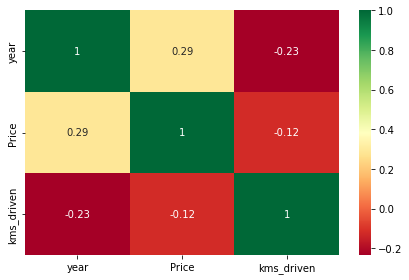

In [37]:
#Checking correlation coefficients

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.tight_layout()
plt.show()

### Splitting the Data into Training and Testing Sets 

In [38]:
import sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [39]:
#check shape for train
df_train.shape

(571, 282)

In [40]:
#check shape for train
df_test.shape

(245, 282)

#### Rescaling the Features

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,Price,kms_driven,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
614,0.842105,0.073200,0.125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
741,0.473684,0.010626,0.225,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0.526316,0.025974,0.090,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
728,0.631579,0.010035,0.160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,1.000000,0.058442,0.000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_train.describe()

,year,Price,kms_driven,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.0,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,0.653701,0.047105,0.119334,0.010508,0.043783,0.008757,0.007005,0.007005,0.043783,0.001751,...,0.0,0.007005,0.001751,0.001751,0.003503,0.001751,0.001751,0.001751,0.001751,0.001751
std,0.209730,0.062433,0.090026,0.102057,0.204791,0.093248,0.083477,0.083477,0.204791,0.041849,...,0.0,0.083477,0.041849,0.041849,0.059131,0.041849,0.041849,0.041849,0.041849,0.041849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.526316,0.017119,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.684211,0.031877,0.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.789474,0.055490,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_new.corr()

,year,Price,kms_driven,BMW,Chevrolet,Datsun,Fiat,Force,Ford,Hindustan,...,Volkswagen Passat Diesel,Volkswagen Polo,Volkswagen Polo Comfortline,Volkswagen Polo Highline,Volkswagen Polo Highline1.2L,Volkswagen Polo Trendline,Volkswagen Vento Comfortline,Volkswagen Vento Highline,Volkswagen Vento Konekt,Volvo S80 Summum
year,1.000000,0.287193,-0.233695,-0.045264,-0.012456,0.099272,-0.056051,0.036056,0.027111,-0.204152,...,-0.030163,0.018747,0.022373,0.013617,0.031659,0.022373,-0.017902,0.056440,-0.017902,0.022373
Price,0.287193,1.000000,-0.120854,0.133712,-0.092045,-0.030557,-0.044610,0.023763,0.028008,-0.013864,...,0.002824,-0.020621,-0.000864,-0.007134,0.004257,-0.004552,-0.020011,0.048356,-0.017402,0.106089
kms_driven,-0.233695,-0.120854,1.000000,-0.002245,0.011662,-0.091118,0.023598,-0.018174,-0.024133,0.072764,...,0.051837,-0.007045,-0.044429,0.014026,-0.014860,-0.021742,0.034983,-0.039733,0.027078,-0.004369
BMW,-0.045264,0.133712,-0.002245,1.000000,-0.020748,-0.009256,-0.006984,-0.006984,-0.019440,-0.006044,...,-0.003485,-0.007813,-0.003485,-0.003485,-0.004932,-0.003485,-0.004932,-0.004932,-0.004932,-0.003485
Chevrolet,-0.012456,-0.092045,0.011662,-0.020748,1.000000,-0.019396,-0.014635,-0.014635,-0.040737,-0.012666,...,-0.007304,-0.016372,-0.007304,-0.007304,-0.010336,-0.007304,-0.010336,-0.010336,-0.010336,-0.007304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Volkswagen Polo Trendline,0.022373,-0.004552,-0.021742,-0.003485,-0.007304,-0.003258,-0.002459,-0.002459,-0.006843,-0.002128,...,-0.001227,-0.002750,-0.001227,-0.001227,-0.001736,1.000000,-0.001736,-0.001736,-0.001736,-0.001227
Volkswagen Vento Comfortline,-0.017902,-0.020011,0.034983,-0.004932,-0.010336,-0.004611,-0.003479,-0.003479,-0.009684,-0.003011,...,-0.001736,-0.003892,-0.001736,-0.001736,-0.002457,-0.001736,1.000000,-0.002457,-0.002457,-0.001736
Volkswagen Vento Highline,0.056440,0.048356,-0.039733,-0.004932,-0.010336,-0.004611,-0.003479,-0.003479,-0.009684,-0.003011,...,-0.001736,-0.003892,-0.001736,-0.001736,-0.002457,-0.001736,-0.002457,1.000000,-0.002457,-0.001736
Volkswagen Vento Konekt,-0.017902,-0.017402,0.027078,-0.004932,-0.010336,-0.004611,-0.003479,-0.003479,-0.009684,-0.003011,...,-0.001736,-0.003892,-0.001736,-0.001736,-0.002457,-0.001736,-0.002457,-0.002457,1.000000,-0.001736


## Building our model

#### Dividing into X and Y sets for the model building

In [45]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('Price')
X_train = df_train

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [48]:
#list out the X_train.columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', False, 257),
 ('kms_driven', False, 259),
 ('BMW', False, 247),
 ('Chevrolet', False, 225),
 ('Datsun', False, 213),
 ('Fiat', False, 250),
 ('Force', False, 171),
 ('Ford', False, 212),
 ('Hindustan', False, 167),
 ('Honda', False, 161),
 ('Hyundai', False, 201),
 ('Jaguar', False, 24),
 ('Jeep', True, 1),
 ('Land', True, 1),
 ('Mahindra', False, 125),
 ('Maruti', False, 17),
 ('Mercedes', False, 72),
 ('Mini', True, 1),
 ('Mitsubishi', False, 170),
 ('Nissan', False, 83),
 ('Renault', False, 91),
 ('Skoda', False, 39),
 ('Tata', False, 67),
 ('Toyota', False, 140),
 ('Volkswagen', False, 33),
 ('Volvo', True, 1),
 ('LPG', False, 258),
 ('Petrol', False, 265),
 ('Audi A4 1.8', False, 253),
 ('Audi A4 2.0', False, 255),
 ('Audi A6 2.0', False, 71),
 ('Audi A8', False, 254),
 ('Audi Q3 2.0', True, 1),
 ('Audi Q5 2.0', False, 256),
 ('Audi Q7', False, 252),
 ('BMW 3 Series', False, 227),
 ('BMW 5 Series', False, 246),
 ('BMW 7 Series', False, 226),
 ('BMW X1', False, 245),
 ('B

In [49]:
# store in col X_train.columns
col = X_train.columns[rfe.support_]
col

Index(['Jeep', 'Land', 'Mini', 'Volvo', 'Audi Q3 2.0', 'Hyundai Eon Sportz',
       'Hyundai Xcent Base', 'Hyundai Xcent SX', 'Hyundai i20 Select',
       'Jeep Wrangler Unlimited', 'Land Rover Freelander', 'Maruti Suzuki 800',
       'Maruti Suzuki Maruti', 'Mini Cooper S', 'Volvo S80 Summum'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['year', 'kms_driven', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force',
       'Ford', 'Hindustan', 'Honda',
       ...
       'Volkswagen Jetta Highline', 'Volkswagen Passat Diesel',
       'Volkswagen Polo', 'Volkswagen Polo Comfortline',
       'Volkswagen Polo Highline', 'Volkswagen Polo Highline1.2L',
       'Volkswagen Polo Trendline', 'Volkswagen Vento Comfortline',
       'Volkswagen Vento Highline', 'Volkswagen Vento Konekt'],
      dtype='object', length=266)

In [51]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
# importing packegaes
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model1

In [53]:

# Generic or hybrid  function to calculate VIF of variables

def VifCalc(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [54]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
0,Jeep,inf
1,Land,inf
2,Mini,inf
3,Volvo,inf
9,Jeep Wrangler Unlimited,inf
10,Land Rover Freelander,inf
13,Mini Cooper S,inf
14,Volvo S80 Summum,inf
11,Maruti Suzuki 800,1.0
12,Maruti Suzuki Maruti,1.0


In [55]:
# add_constant and use OLS metheod
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_model1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     14.10
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           5.52e-15
Time:                        16:30:15   Log-Likelihood:                 813.94
No. Observations:                 571   AIC:                            -1614.
Df Residuals:                     564   BIC:                            -1583.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# 

In [56]:
# We are dropping humidity variable as it has high p-value
X_train_rfe = X_train_rfe.drop(["Maruti Suzuki 800"], axis = 1)

In [57]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
0,Jeep,inf
1,Land,inf
2,Mini,inf
3,Volvo,inf
9,Jeep Wrangler Unlimited,inf
10,Land Rover Freelander,inf
12,Mini Cooper S,inf
13,Volvo S80 Summum,inf
11,Maruti Suzuki Maruti,1.0
4,Audi Q3 2.0,NaN


In [58]:
# We are dropping humidity variable as it has high p-value
X_train_rfe = X_train_rfe.drop(["inf"], axis = 1)

KeyError: "['inf'] not found in axis"

In [ ]:
# calculate VIF

VifCalc(X_train_rfe)